{'metadata': {'height': 350, 'format': 'Jpeg', 'width': 528}, 'description': {'tags': ['fruit', 'apple', 'indoor', 'red', 'table', 'sitting', 'plate', 'surface', 'white', 'banana', 'food', 'bowl', 'orange', 'board', 'cake', 'laying'], 'captions': [{'confidence': 0.6983767582384243, 'text': 'a red apple sitting on a table'}]}, 'color': {'dominantColors': ['White', 'Red'], 'dominantColorForeground': 'Red', 'accentColor': 'C50739', 'isBwImg': False, 'dominantColorBackground': 'White'}, 'requestId': '0d1e5c19-d760-4ae5-981f-0aecf661f4a1', 'categories': [{'name': 'object_sculpture', 'score': 0.75}]}


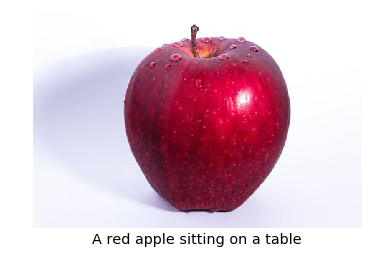

In [2]:
import requests

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "<subscription_key>"
assert subscription_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

# Set image_path to the local path of an image that you want to analyze.
image_path = "a.jpeg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
              'Content-Type': 'application/octet-stream'}
params     = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)